### 데이터 불러오기 및 데이터 구조 확인

In [100]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [101]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 데이터 합치기

In [103]:
red_wine['color'] = 1
white_wine['color'] = 0

In [104]:
wine = pd.concat([red_wine, white_wine])
wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

### quality의 속성 및 분포도 확인

In [105]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [106]:
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [107]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### 레드/화이트 와인별 등급 확인

In [108]:
fig = px.histogram(wine, x='quality', color='color')
fig.show()

### 레드/화이트 와인 분류기_데이터분리(훈련용, 테스트용)

In [109]:
X = wine.drop(['color'], axis = 1) # feature
y = wine['color'] # label

# color에 따라 와인을 구별할 것으로 feature 데이터 에서는 color 컬럼을 삭제하고 label 데이터에서는 color 컬럼만 지정해준다

In [110]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=13)

# 나눈 데이터의 속성과 나눠진 비율 확인
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

### 훈련용과 테스트용 레드/화이트 와인 구분 정도 확인

In [111]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name = 'Test'))

fig.update_layout(barmode = 'overlay') # overlay : 겹치도록 설정
fig.update_traces(opacity = 0.75) # opacity : 투명도
fig.show()


### 결정나무 훈련 및 학습 결과

In [112]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [113]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train) # train 예측
y_pred_test = wine_tree.predict(X_test) # test 예측

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))
# accuracy_score(정답데이터, 예측데이터) : 정답데이터와 예측데이터를 비교하여 정확도를 계산해달라는 명령어 

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


### 와인데이터의 특성 확인(boxplot)

In [114]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [115]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

fig.show()

# 컬럼들의 범위의 격차가 심하면 교육이 제대로 안될 수도 있다
# 최대/최소 범위가 다르고 평균과 분산이 각각 다르다
# 특성의 편향 문제는 최적의 모델을 찾는데 방해가 될 수도 있다

### MinMaxScaler와 StandardScaler 적용

In [116]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

X_ss = SS.fit_transform(X)
X_mss = MMS.fit_transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mss, columns=X.columns)

# 결정나무에서는 이런 전처리는 의미를 가지진 않는다
# 주로 cost function을 최적화할 때 유효한 경우가 있다
# MinMaxScaler와 StandardScaler 적용해봐야 어느 것이 효율적인지 알 수 있다

### MinMaxScaler
- 최대/최소값을 강제로 1과 0으로 설정하는 것

In [117]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name='quality'))

fig.show()

### StandardScaler
- 평균을 0으로 표준편차를 1로 설정

In [118]:
def px_box(target_pd):
    fig = go.Figure()
    fig.add_trace(go.Box(y=target_pd['fixed acidity'], name='fixed acidity'))
    fig.add_trace(go.Box(y=target_pd['chlorides'], name='chlorides'))
    fig.add_trace(go.Box(y=target_pd['quality'], name='quality'))
    fig.show()

In [119]:
px_box(X_ss_pd)

### MinMaxScaler를 적용한 학습
- 결정나무에선 MinMaxScaler 전처리는 의미가 없다

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))
# accuracy_score(정답데이터, 예측데이터) : 정답데이터와 예측데이터를 비교하여 정확도를 계산해달라는 명령어

Train ACC :  0.9553588608812776
Test ACC :  0.9569230769230769


### StandardScalar를 적용한 학습
- 결정나무에선 StandardScalar를 전처리는 의미가 없다

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.9553588608812776
Test ACC :  0.9569230769230769


### 결정나무는 어떻게 화이트/레드 와인을 구분하는가?
- total sulfur dioxide 를 첫번째 중요 feature로 residual sugar 를 두번쨰 중요 feature로 설정

[Text(0.5, 0.8333333333333334, 'total sulfur dioxide <= -0.854\ngini = 0.372\nsamples = 5197\nvalue = [3913, 1284]'),
 Text(0.25, 0.5, 'chlorides <= -0.272\ngini = 0.183\nsamples = 1128\nvalue = [115, 1013]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.201\nsamples = 115\nvalue = [102, 13]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.025\nsamples = 1013\nvalue = [13, 1000]'),
 Text(0.75, 0.5, 'chlorides <= 0.384\ngini = 0.124\nsamples = 4069\nvalue = [3798, 271]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.022\nsamples = 3674\nvalue = [3633, 41]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.486\nsamples = 395\nvalue = [165, 230]')]

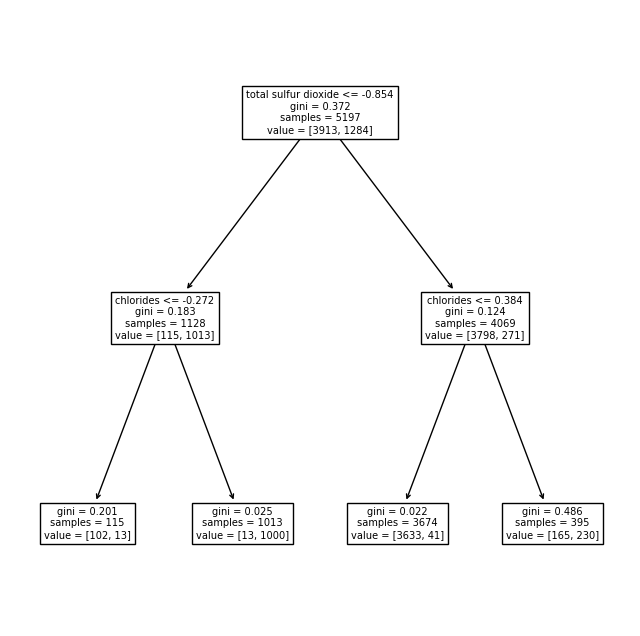

In [122]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
feature_names_list  = X.columns.tolist()
# .tolist() : 인덱스 데이터를 리스트로 변환해주는 메써드
plot_tree(wine_tree, feature_names=feature_names_list)

### 레드와인/화이트와인을 구분하는 중요 특성 확인

In [124]:
dict(zip(X_train.columns, wine_tree.feature_importances_))
# .feature_importances_ : max_depth= 설정 시 모델을 결정하기 위한 중요 feature가 어떻게 나왔는지 각각의 중요도를 보여주는 메써드
# max_depth= 를 높게 설정하게 되면 모델이 복잡해지면서 여러가지 feature를 더 많이 고려한 것을 보여준다

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [125]:
wine['taste'] = [1.0 if grade > 5 else 0.0 for grade in wine['quality']]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0


### taste로 데이터 분리 및 학습 후 예측

In [126]:
X = wine.drop(['taste'], axis = 1) # feature
y = wine['taste'] # label

# taste에 따라 와인을 구별할 것으로 feature 데이터 에서는 taste 컬럼을 삭제하고 label 데이터에서는 taste 컬럼만 지정해준다

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [127]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))
# accuracy_score(정답데이터, 예측데이터) : 정답데이터와 예측데이터를 비교하여 정확도를 계산해달라는 명령어

Train ACC :  1.0
Test ACC :  1.0


### 정확도가 왜 100% 인가? 이건 불가능하다
- quality를 feature에서 지우지 않았기 때문에 taste의 기준이 되었던 quality로 학습을 진행하여 정확도가 100%가 나올수 있었다
- 잘못된 feature 설정에 의하여 잘못된 학습을 진행한 경우이다

[Text(0.5, 0.75, 'quality <= 5.5\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1907\nvalue = [1907, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3290\nvalue = [0, 3290]')]

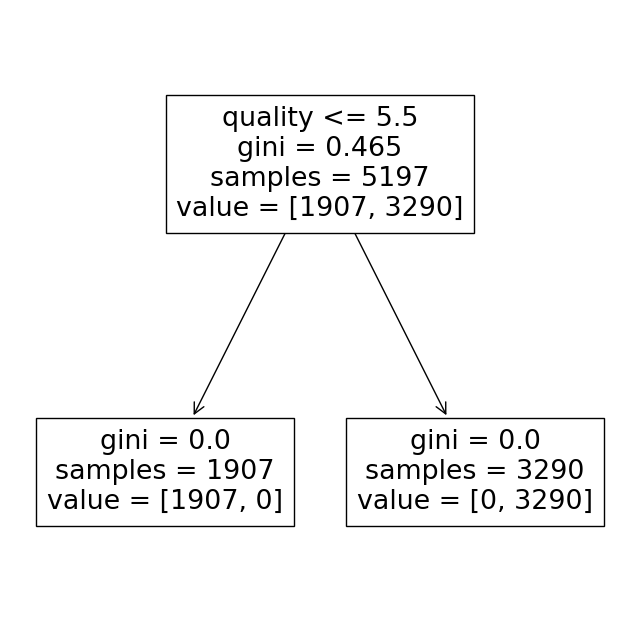

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
feature_names_list  = X.columns.tolist()
# .tolist() : 인덱스 데이터를 리스트로 변환해주는 메써드
plot_tree(wine_tree, feature_names=feature_names_list)

In [129]:
X = wine.drop(['taste', 'quality'], axis = 1) # feature
y = wine['taste'] # label

# taste에 따라 와인을 구별할 것으로 feature 데이터 에서는 taste 컬럼을 삭제하고 label 데이터에서는 taste 컬럼만 지정해준다
# 전 과정에 의하여 quality로 인하여 잘못된 학습이 진행되어 feature 데이터 에서 quality도 삭제

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [130]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))
# accuracy_score(정답데이터, 예측데이터) : 정답데이터와 예측데이터를 비교하여 정확도를 계산해달라는 명령어

Train ACC :  0.7294593034442948
Test ACC :  0.7161538461538461


### 어떤 와인이 맛있다고 할 수 있을까?
- 결정나무는 와인을 평가할때 alcohol을 가장 첫번째 기준으로 꼽았다 
- 결국에 와인의 다양한 속성들이 있지만 알콜의 도수가 맛있는 와인을 평가하는 첫번째 기준이 되었다

[Text(0.5, 0.8333333333333334, 'alcohol <= 10.525\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.5, 'volatile acidity <= 0.237\ngini = 0.499\nsamples = 2950\nvalue = [1546, 1404]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.397\nsamples = 791\nvalue = [216, 575]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.473\nsamples = 2159\nvalue = [1330, 829]'),
 Text(0.75, 0.5, 'free sulfur dioxide <= 13.5\ngini = 0.27\nsamples = 2247\nvalue = [361, 1886]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.439\nsamples = 427\nvalue = [139, 288]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.214\nsamples = 1820\nvalue = [222, 1598]')]

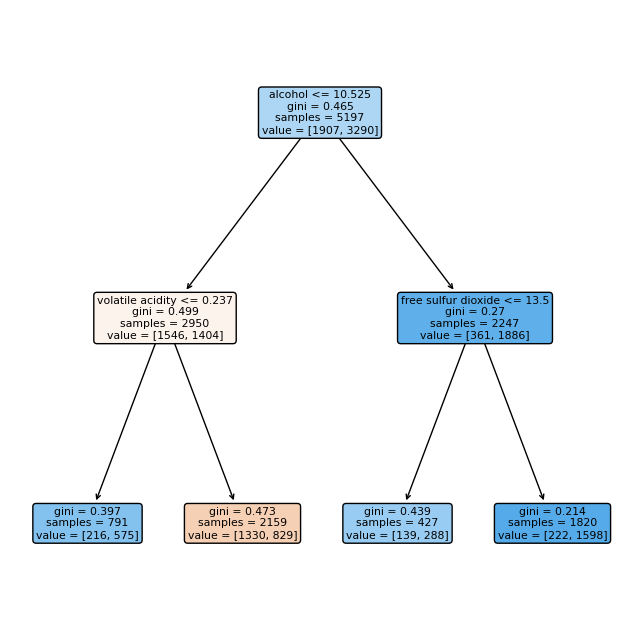

In [132]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
feature_names_list  = X.columns.tolist()
# .tolist() : 인덱스 데이터를 리스트로 변환해주는 메써드
plot_tree(wine_tree, feature_names=feature_names_list,
          rounded=True, filled=True)